# Sistema de predicción y prevención de accidentes de tránsito con enfoque en motociclistas

## Entrenamiento del modelo SVC

In [1]:
# Zona de imports


# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
#import seaborn as sns
#from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

### Datos

En primera instancia, se toman los datos procesados del archivo "datos_procesados.csv", el cual se encuentra adjunto a este documento, y se separan en datos dependientes e independientes(y,x)

In [2]:
datos_procesados=pd.read_csv("datos_procesados.csv")


#Cargando todos los datos(x para los datos independientes, y para los dependientes)
# ========================================================
x=datos_procesados.drop("evento",axis=1)
y=datos_procesados["evento"]

Como segundo paso, los datos de la variable "datos_procesados" se deben dividir en datos de entrenamiento y datos de prueba, los primeros, como su nombre lo dice, seran usados para entrenar al modelo, y los segundos serviran para probar el porcentaje de acertación del modelo ya entrenado.

Para ello, se dividiran los datos en un porcentaje 20%/80%, el primero para las pruebas, y el segundo para el entrenamiento

In [3]:
#dividiendo los datos entre datos de entrenamiento y de prueba
#===============================================================
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20)

Como ultimo paso, solo haria falta crear y entrenar al modelo

In [4]:
#               Funcion para entrenar el modelo svc
#========================================================

def svc_Creator(xtrain,ytrain)->SVC:
    svc=SVC()
    svc.fit(xtrain, ytrain)
    return svc

In [5]:
svcClassifier=svc_Creator(X_train,y_train)

## Pruebas de exactitud para el modelo

Ya creado y entrenado el modelo, solo haria falta probar su exactitud, para lo cual, se usaran las variables "..._test" creadas anteriormente, los cuales guardan un porcentaje de los datos de la tabla "datos_procesados"

In [6]:
# Evaluando el "Score" del modelo, un parametro que calcula el promedio de exactitud
#===================================================================================

score=svcClassifier.score(X_train,y_train)
print("El score del modelo es de : ", score)

El score del modelo es de :  0.8373797526339899


In [7]:
#   Haciendo predicciones usando los datos de prueba "..._test"
# ===========================================================
y_pred=svcClassifier.predict(X_test)

#   Evaluando la prediccion
# ==============================

# print(confusion_matrix(y_test,y_pred))
classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81       123
         1.0       0.87      0.85      0.86       169
         2.0       0.88      0.87      0.88       185
         3.0       1.00      0.23      0.38        69

    accuracy                           0.81       546
   macro avg       0.86      0.74      0.73       546
weighted avg       0.85      0.81      0.79       546



Como un agregado, se puede iterar varias veces la creacion y entrenamiento del modelo con el fin de evaluar la exactitud cuando se crea mas de un modelo con los mismos datos.

In [8]:
def prediccion(independiente, dependiente,cantPruebas=10, testSize=0.2):
    scores=np.array([])
    accuracy=np.array([])

    

    # Repitiendo la prueba tantas veces como se indique en "cantPruebas"
    for i in range(cantPruebas):
        # dividiendo los datos
        x_train, x_test, y_train, y_test=train_test_split(independiente,dependiente,test_size=testSize)

        #Creando y entrenando el modelo
        svc=svc_Creator(x_train,y_train)
        
        y_pred=svcClassifier.predict(x_test)

        #obteniendo el score(usando la funcion del objeto SVC) y el accuracy(usando el classification_report)
        # Agregandolos a arrays
        accuracy=np.append(accuracy,classification_report(y_test,y_pred,output_dict=True)["accuracy"])
        scores=np.append(scores,svc.score(x_train,y_train))

    return scores, accuracy
    

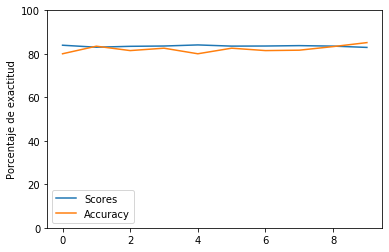

In [9]:
cantidad_pruebas=10

scores,accuracy=prediccion(x,y,cantPruebas=cantidad_pruebas)
scores=scores*100
accuracy=accuracy*100

x_data=np.arange(10)

plt.plot(x_data, scores)
plt.plot(x_data, accuracy)

plt.ylabel("Porcentaje de exactitud")
plt.ylim(0,100)

plt.legend(["Scores", "Accuracy"])

plt.show()

## Conclusión

La implementación del modelo SVC tiene un porcentaje de exactitud de mas del 80% en la mayoria(por no decir todos) los casos, por lo que es apto para su uso en el proyecto de Sistema de predicción y prevención de accidentes de tránsito con enfoque en motociclistas